In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import math
import random
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
inputs=[]
outputs=[]
scaler = MinMaxScaler()
def sourceFunction(x):
    return (10*math.pow(x,5))+(5*math.pow(x,4))+(2*math.pow(x,3))-(0.5*math.pow(x,2))+(3*x)+2

dataSize = 5000
scaler = MinMaxScaler()
inputs = np.linspace(0,20,dataSize)
np.random.shuffle(inputs)
for i in range(len(inputs)):
        outputs.append(sourceFunction(inputs[i]))
outputs = scaler.fit_transform(np.array(outputs).reshape(-1, 1)).flatten()
trainingSet = np.array(inputs[:math.floor(len(inputs)*0.8)])
trainingLabels = np.array(outputs[:math.floor(len(outputs)*0.8)])
testingSet = np.array(inputs[math.floor(len(inputs)*0.8):])
testingLabels = np.array(outputs[math.floor(len(outputs)*0.8):])

In [3]:
model = Sequential()
model.add(Dense(2, input_shape=(1,), kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(1, activation='linear', kernel_initializer='normal'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 4         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error']) 
history = model.fit(trainingSet, trainingLabels, epochs=200, batch_size=5, verbose=1)

Epoch 1/200
800/800 [==============================] - 1s 678us/step - loss: 0.1389 - mean_absolute_error: 0.1389
Epoch 2/200
800/800 [==============================] - 1s 685us/step - loss: 0.1201 - mean_absolute_error: 0.1201
Epoch 3/200
800/800 [==============================] - 1s 656us/step - loss: 0.1143 - mean_absolute_error: 0.1143
Epoch 4/200
800/800 [==============================] - 0s 612us/step - loss: 0.1113 - mean_absolute_error: 0.1113
Epoch 5/200
800/800 [==============================] - 0s 617us/step - loss: 0.1092 - mean_absolute_error: 0.1092
Epoch 6/200
800/800 [==============================] - 0s 610us/step - loss: 0.1076 - mean_absolute_error: 0.1076
Epoch 7/200
800/800 [==============================] - 0s 613us/step - loss: 0.1064 - mean_absolute_error: 0.1064
Epoch 8/200
800/800 [==============================] - 0s 615us/step - loss: 0.1054 - mean_absolute_error: 0.1054
Epoch 9/200
800/800 [==============================] - 0s 603us/step - loss: 0.1046 - me

800/800 [==============================] - 0s 608us/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 73/200
800/800 [==============================] - 0s 601us/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 74/200
800/800 [==============================] - 0s 603us/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 75/200
800/800 [==============================] - 0s 611us/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 76/200
800/800 [==============================] - 0s 612us/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 77/200
800/800 [==============================] - 0s 599us/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 78/200
800/800 [==============================] - 0s 616us/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 79/200
800/800 [==============================] - 0s 601us/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 80/200
800/800 [==============================] - 0s 610us/step - loss: 0.0036 - mean_a

Epoch 143/200
800/800 [==============================] - 0s 615us/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 144/200
800/800 [==============================] - 0s 624us/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 145/200
800/800 [==============================] - 0s 605us/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 146/200
800/800 [==============================] - 0s 616us/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 147/200
800/800 [==============================] - 0s 608us/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 148/200
800/800 [==============================] - 0s 604us/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 149/200
800/800 [==============================] - 1s 672us/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 150/200
800/800 [==============================] - 1s 634us/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 151/200
800/800 [==============================] - 0s 612us/step -

In [5]:
test_results = model.evaluate(testingSet, testingLabels, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

32/32 [==============================] - 0s 678us/step - loss: 0.0035 - mean_absolute_error: 0.0035
Test results - Loss: 0.0034504435025155544 - Accuracy: 0.0034504435025155544%


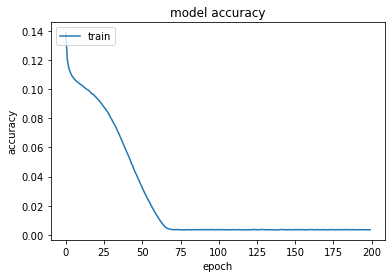

In [6]:
plt.plot(history.history['mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

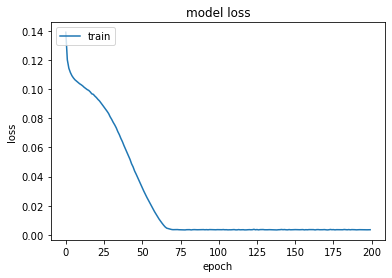

In [7]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

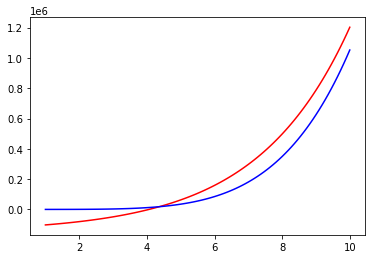

In [8]:
x = np.linspace(1,10,100)
ypredict = scaler.inverse_transform(model.predict(x).reshape(-1, 1)).flatten()
y = []
for i in range(len(x)):
    y.append(sourceFunction(x[i]))
plt.plot(x,ypredict, 'r', ls = '-')
plt.plot(x,y, 'b', ls = '-')
plt.show()